<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** 
- Bryan Azahel Juárez Pineda.
- Rodrigo Martínez Gallardo Bertoldi

**Fecha:** 03 de marzo del 2021.

**Expediente** : 
- 722176.
- 
    
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 6: Clase 10.

[Liga al repositorio](https://github.com/Bryan722176/ProyectoConjunto_RMartinez_BAJuarez)

### Proyecto Conjunto.
> Instrucciones: Cada estudiante debe proponer una solución óptima a los problemas planteados a continuación.

# Tarea 6
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
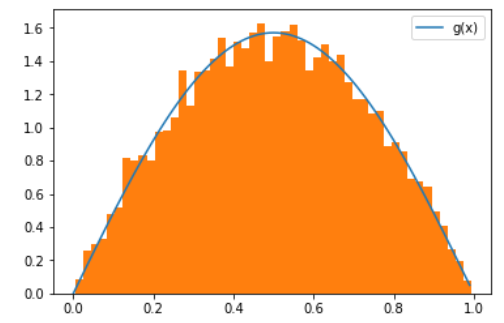

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
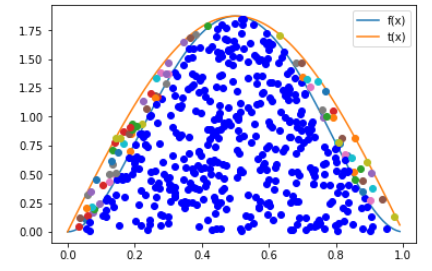

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

8. Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

### _Solución Bryan._

In [5]:
# Importamos líbrerias a utilizar.
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline

#### Solución ejercicio 1.

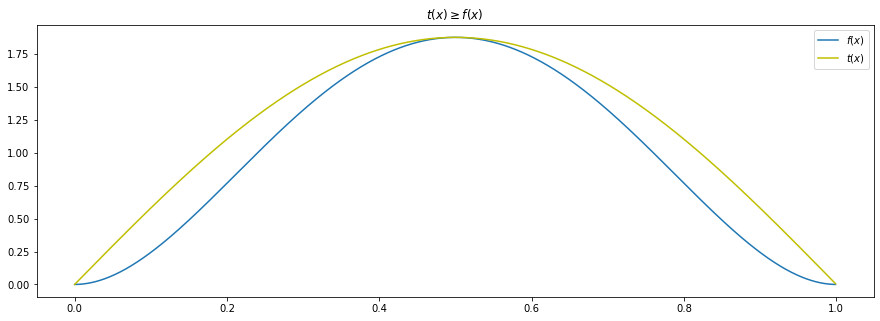

In [13]:
# Generamos un vector donde tendremos el valor correspondiente a x. 1000 valores.
x = np.arange(0,1,0.001)

# Definimos f(x).
f = lambda x: 30*(x**2 - 2*x**3 + x**4)

# Definimos el valor de 'a' como el máximos de la función f(x).
a = f(optimize.fmin(lambda x:-f(x), 0, disp=False))
# Definimos t(x).
t = lambda x: a*np.sin(np.pi*x)

# Graficamos las funciones generadas.
plt.figure(figsize=[15,5])
plt.plot(x, f(x), label='$f(x)$')
plt.plot(x, t(x), 'y', label='$t(x)$')
plt.title('$t(x) \geq f(x)$')
plt.legend();

Al observar nuestra gráfica podemos darnos cuenta que en efecto se cumple la relación donde $t(x) \geq f(x)$.

#### Solución ejercicio 2.

Se pide encontrar la función de densidad de probabilidad correspondiente a la función $t(x)$, es decir, buscamos $g(x)$.

Para comenzar sabemos que $t(x)$ no representa una función de densidad de probabilidad esto porque su integral de $-\infty$ a $\infty$ es mayor a $1$. Entonces con este preambulo podemos definir $g(x)$ de la siguiente manera:
$$ g(x) = \frac{t(x)}{c} $$
Donde $c = \int_{-\infty}^{\infty} t(x)\cdot dx$

De esta manera al integrar $g(x)$ obtenemos la siguiente expresión:
$$ \int_{-\infty}^{\infty} g(x)\cdot dx = \frac{\int_{-\infty}^{\infty} t(x)\cdot dx}{\int_{-\infty}^{\infty} t(x)\cdot dx} = 1 $$

Por lo tanto $g(x)$ **SI** es una función de distribución de probabilidad.

Con esto en cuenta buscaremos $g(x)$ conociendo que $t(x)$ se define por la siguiente ecuación:
$$ t(x) = asin(\pi x) $$

Por lo tanto:
$$ g(x) = \frac{asin(\pi x)}{c} $$

Donde el intervalo de integración para nuestra $c$ está definido en el dominio que nos interesa estudiar, es decir, $[0,1]$. Entonces obtenemos la siguiente expresión:
$$ g(x) = \frac{asin(\pi x)}{a \int_{0}^{1} sin(\pi x)\cdot dx} = \frac{sin(\pi x)}{\int_{0}^{1} sin(\pi x)\cdot dx} $$

Ahora nos enfocaremos en resolver la integral definida en el denominador de la expresión anterior.
$$ \int_{0}^{1} sin(\pi x)\cdot dx $$

Para resolver la integral, utilizaremos integración por sustitución, donde definiremos los siguientes parámetros: 
$$v = \pi x$$ 
$$dx = \frac{dv}{\pi}$$

Sutituyendo en nuestra integral obtenemos la siguiente expresión:
$$ \int_{0}^{1} sin(v)\cdot \frac{dv}{\pi} = \frac{1}{\pi} \int_{0}^{1} sin(v)\cdot dv $$

Integrando, obtenemos lo siguiente:
$$ -\frac{1}{\pi}\cdot[cos(v)]_{0}^{1} $$

Recordando el parámetro $v = \pi x$
$$ -\frac{1}{\pi}\cdot[cos(\pi x)]_{0}^{1} = \frac{2}{\pi} $$

Por lo tanto:
$$ g(x) = \frac{sin(\pi x)}{\frac{2}{\pi}} = \frac{\pi}{2}\cdot[sin(\pi x)] $$

#### Solución ejercicio 3.

Ya con $g(x)$ definida, para encontrar las 

In [ ]:
# Solución ejercicio 4.

In [ ]:
# Solución ejercicio 5.

In [ ]:
# Solución ejercicio 6.

In [ ]:
# Solución ejercicio 7.

In [ ]:
# Solución ejercicio 8.

### _Solución Rodrigo._

In [ ]:
# Solución ejercicio 1.

In [ ]:
# Solución ejercicio 2.

In [ ]:
# Solución ejercicio 3.

In [ ]:
# Solución ejercicio 4.

In [ ]:
# Solución ejercicio 5.

In [ ]:
# Solución ejercicio 6.

In [ ]:
# Solución ejercicio 7.